In [ ]:
# This will be my selection for the homework grade out of the project extras.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [13]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [14]:
null = data.isna().any()
print(null)

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool


In [15]:
unique_values = data.nunique()
print("Unique values for each column:\n", unique_values)

Unique values for each column:
 age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64


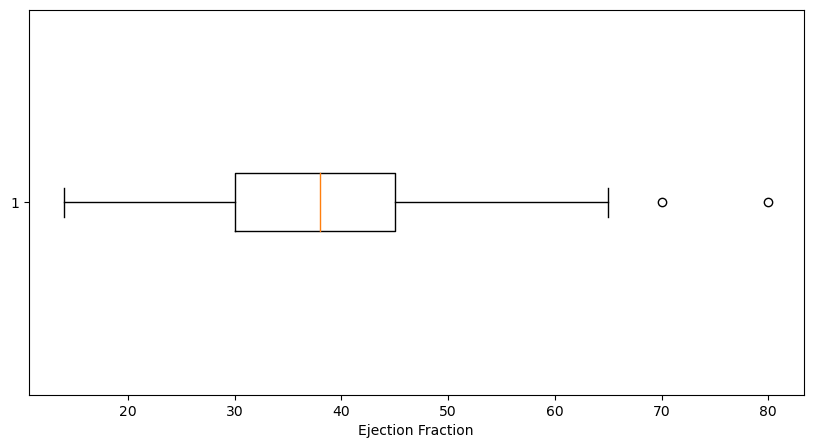

In [16]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['ejection_fraction'], vert=False)
plt.xlabel('Ejection Fraction')
plt.show()

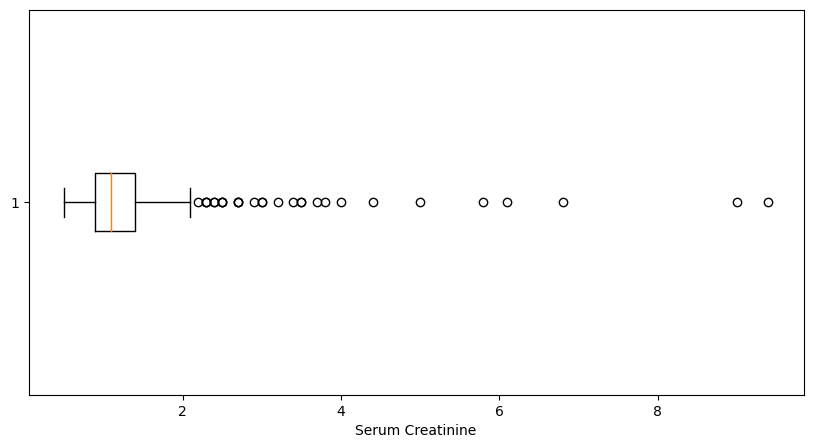

In [17]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['serum_creatinine'], vert=False)
plt.xlabel('Serum Creatinine')
plt.show()

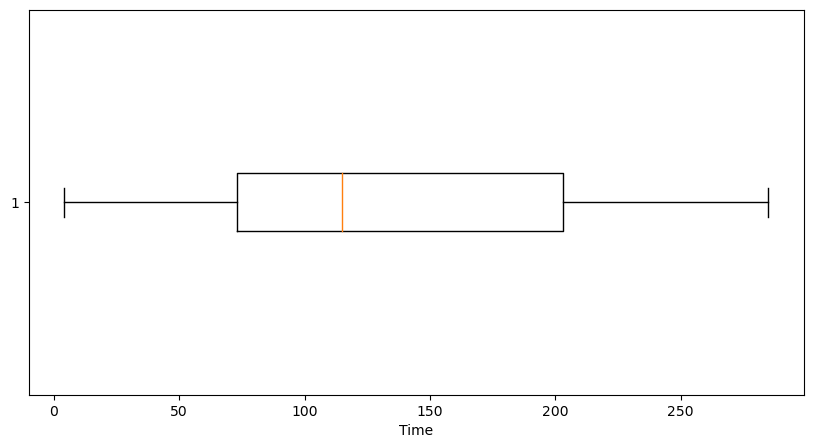

In [18]:
plt.figure(figsize=(10, 5))
plt.boxplot(data['time'], vert=False)
plt.xlabel('Time')
plt.show()

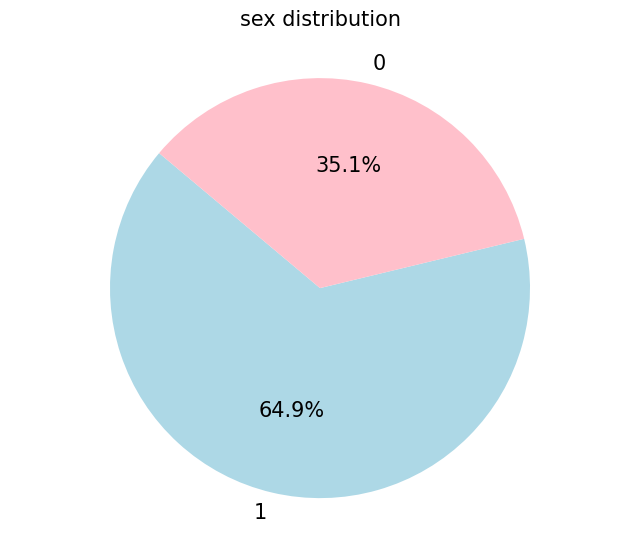

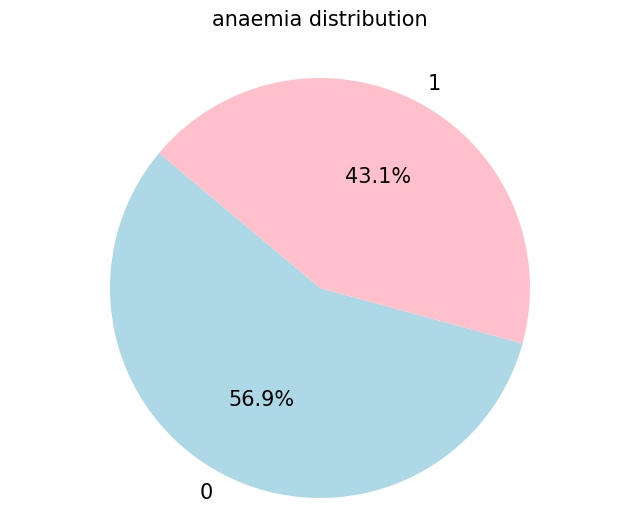

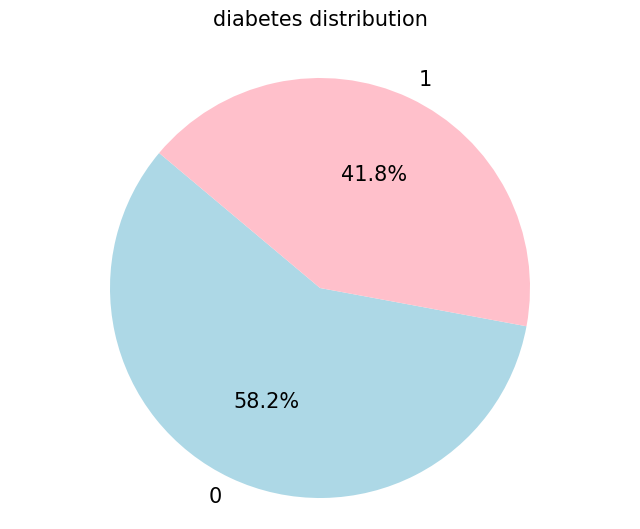

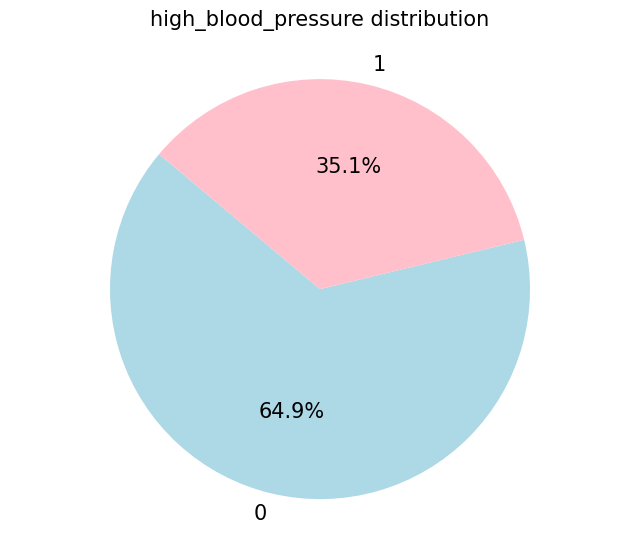

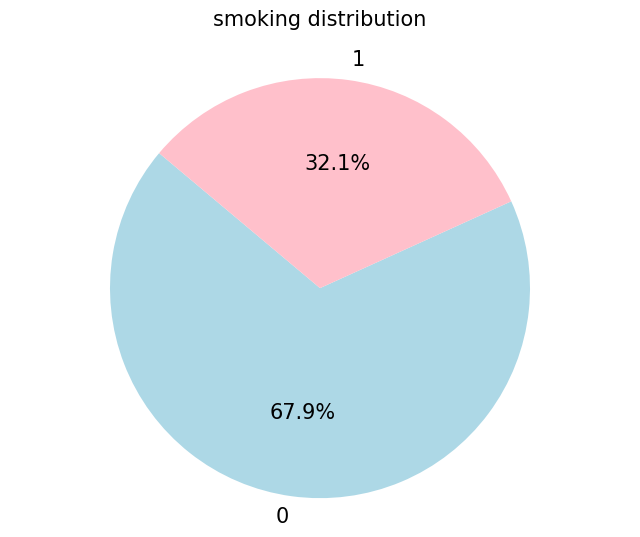

In [19]:
categorical_columns = ['sex','anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

for col in categorical_columns:
    column_counts = data[col].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink'], textprops={'fontsize': 15})
    plt.title(f'{col} distribution\n', fontsize= 15)
    plt.axis('equal')
    plt.show()

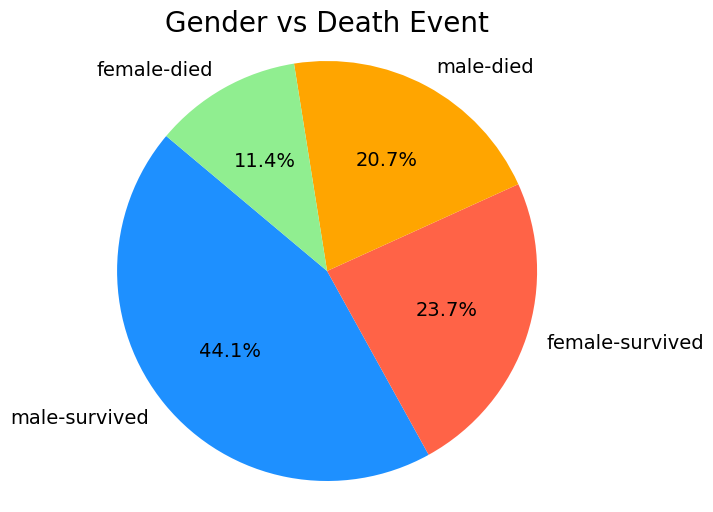

In [20]:
data['survivor_gender'] = data.apply(lambda row: 'male-survived' if row['sex'] == 1 and row['DEATH_EVENT'] == 0
                                            else 'female-survived' if row['sex'] == 0 and row['DEATH_EVENT'] == 0
                                            else 'male-died' if row['sex'] == 1 and row['DEATH_EVENT'] == 1
                                            else 'female-died', axis=1)

# Count the occurrences of each category
gender_counts = data['survivor_gender'].value_counts()

# Create a pie chart for the survivor gender distribution
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['dodgerblue', 'tomato', 'orange', 'lightgreen'], textprops={'fontsize': 14})
plt.title('Gender vs Death Event', fontsize = 20)
plt.axis('equal')
plt.show()

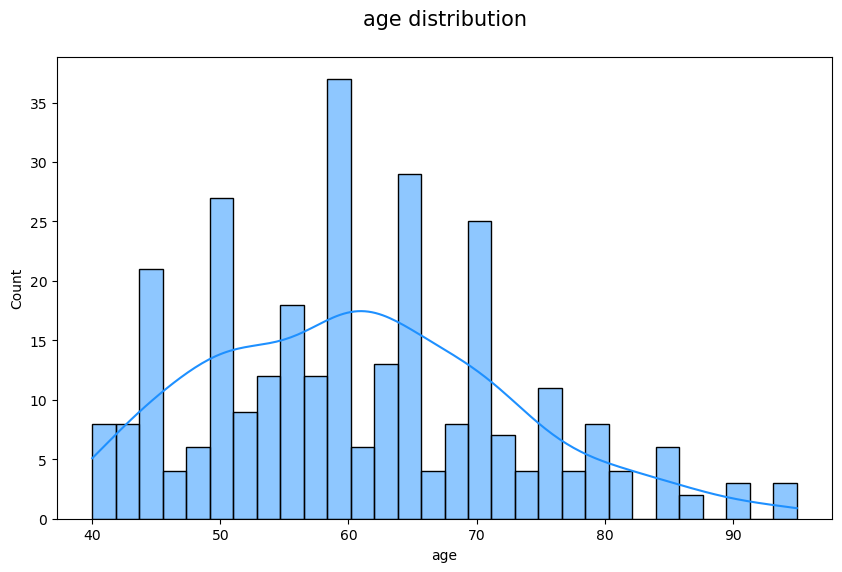

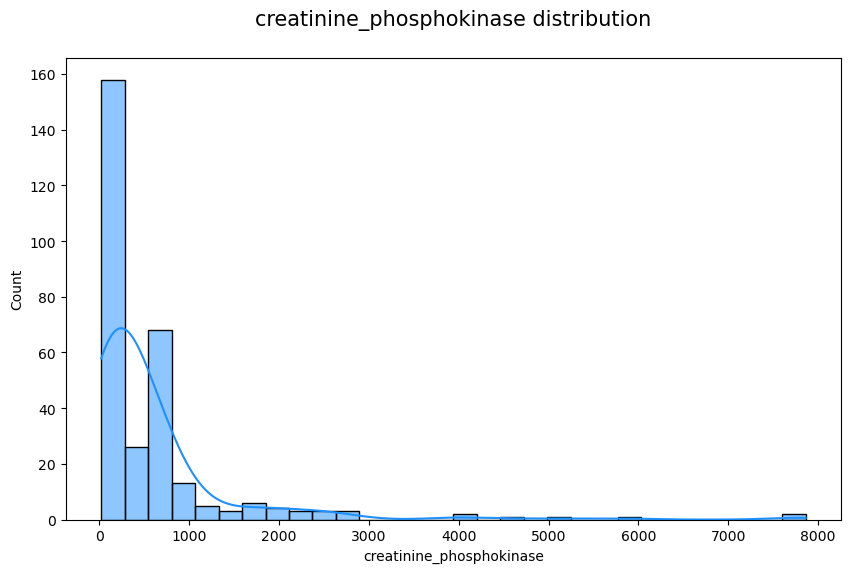

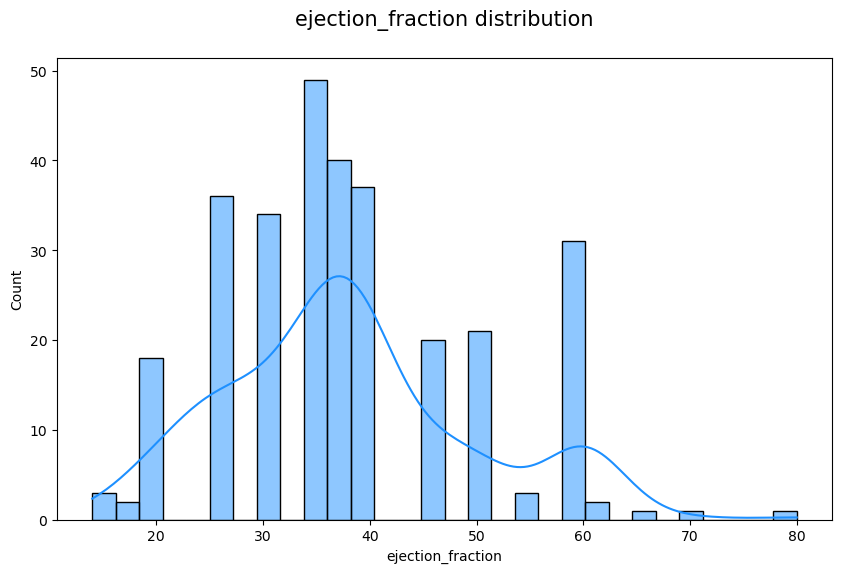

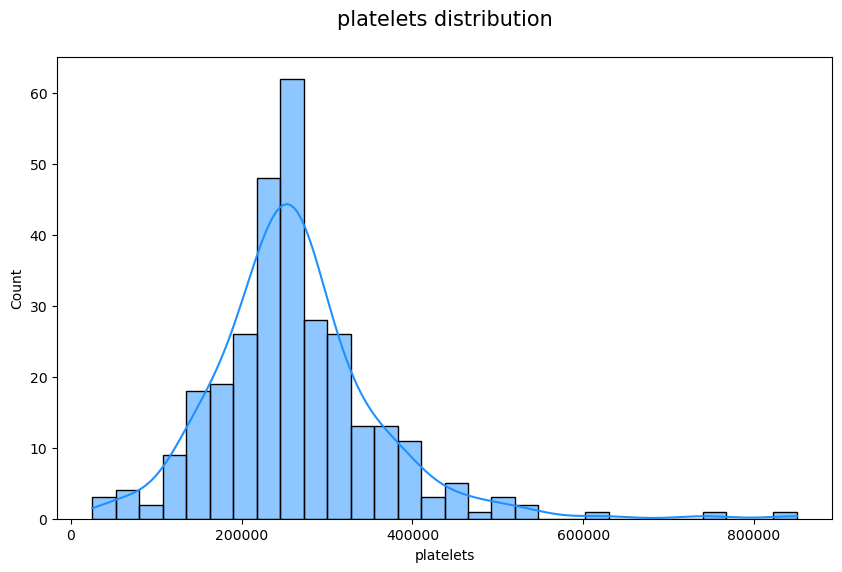

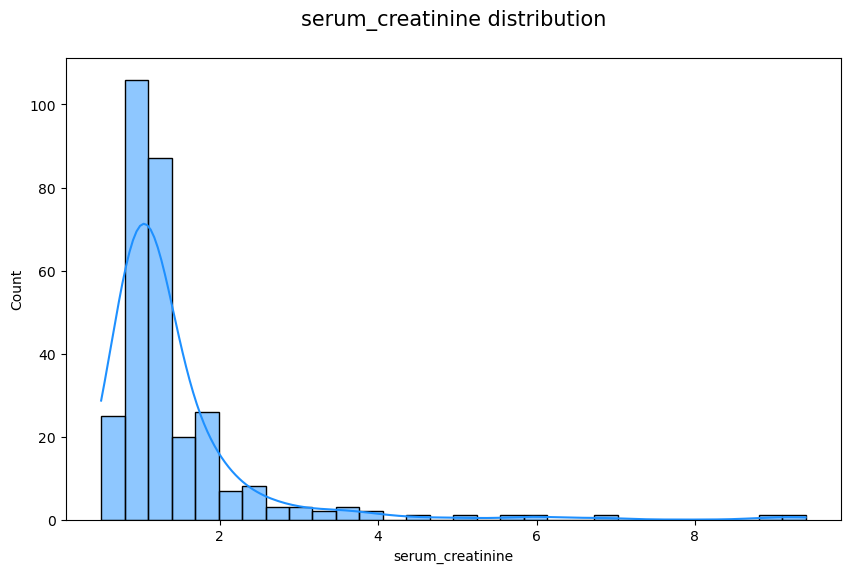

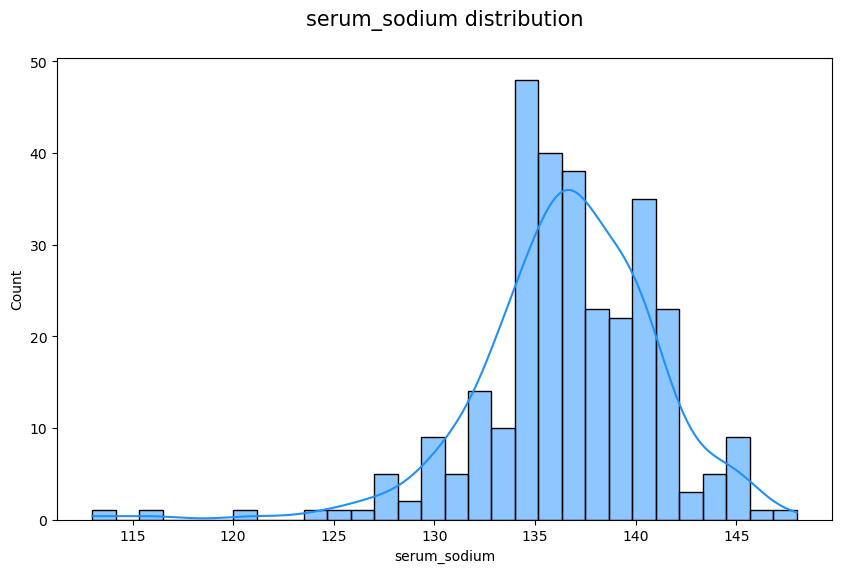

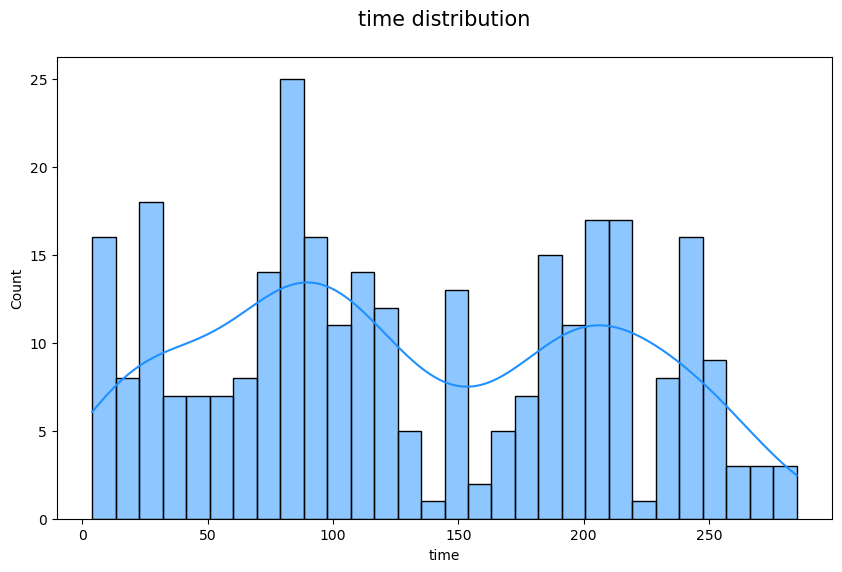

In [21]:
numerical_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 
                     'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Step 2: Loop through each numerical column and create distribution plots
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, kde=True, color='dodgerblue', bins=30)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column} distribution\n', fontsize= 15)
    
    plt.show()

/var/folders/q2/n5lfn6l91n13qkx75m467_rw0000gn/T/ipykernel_1218/1072937887.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


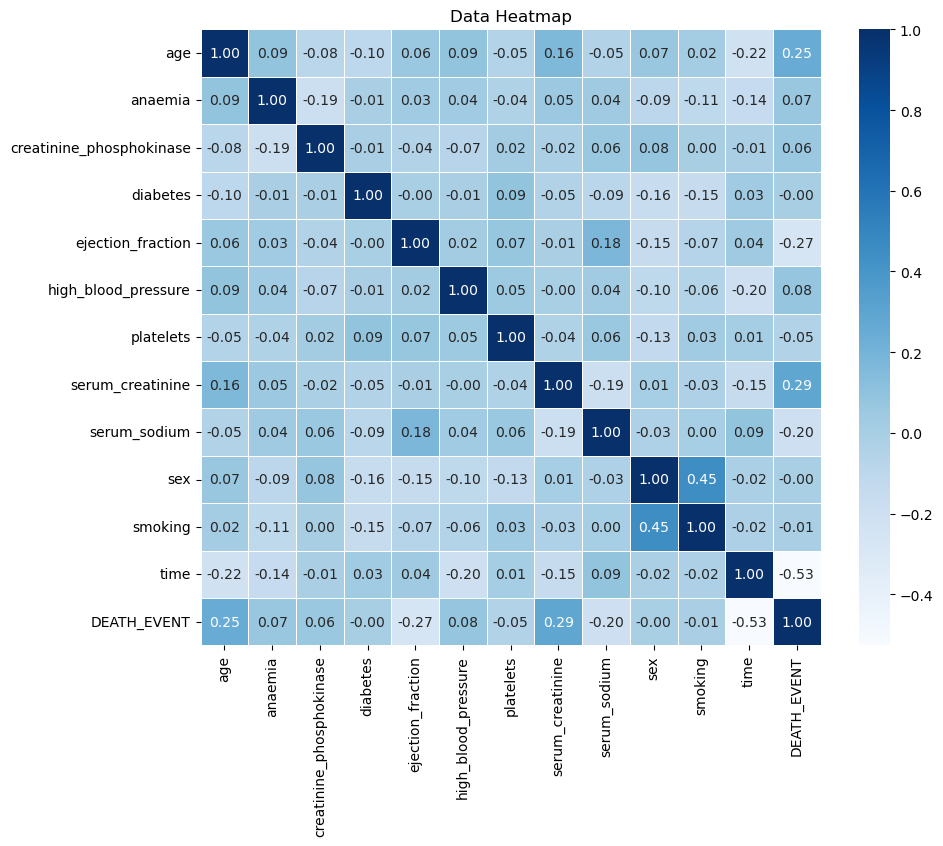

In [22]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Data Heatmap')
plt.show()

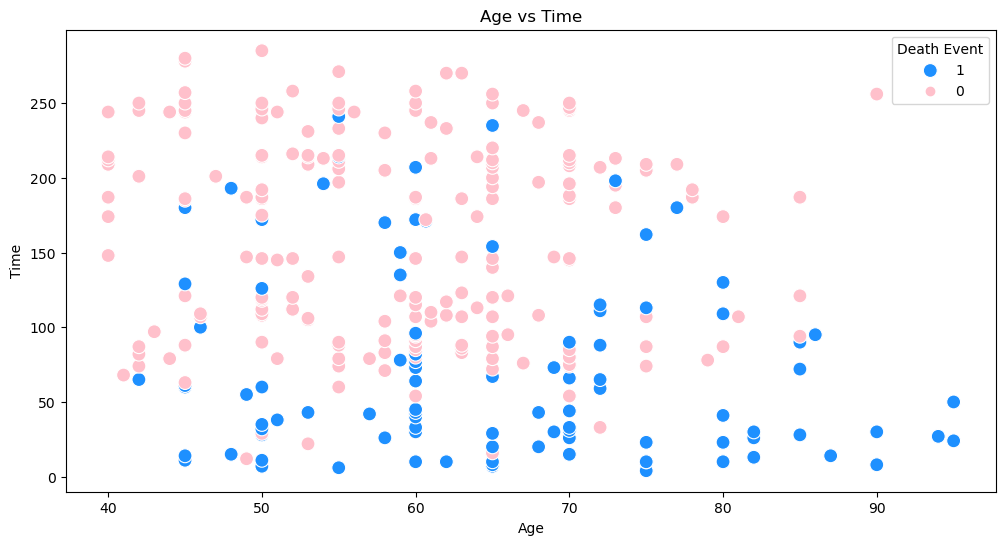

In [23]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='time', hue='DEATH_EVENT', data=data, palette={0: 'pink', 1: 'dodgerblue'}, marker='o', s=100)

plt.xlabel('Age')
plt.ylabel('Time')
plt.title('Age vs Time')
plt.legend(title='Death Event', labels=['1', '0'])
plt.show()


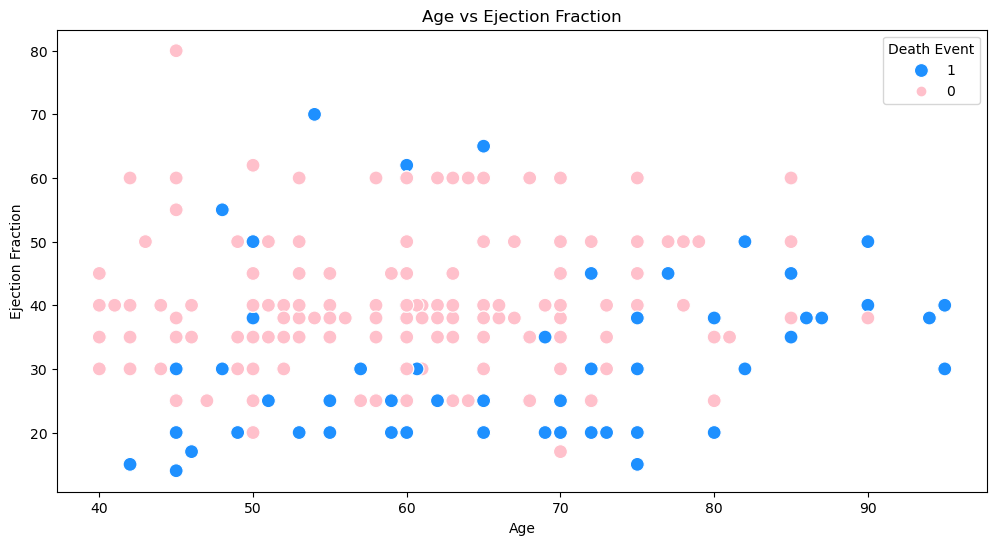

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='ejection_fraction', hue='DEATH_EVENT', data=data, palette={0: 'pink', 1: 'dodgerblue'}, marker='o', s=100)

plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.title('Age vs Ejection Fraction')
plt.legend(title='Death Event', labels=['1', '0'])
plt.show()


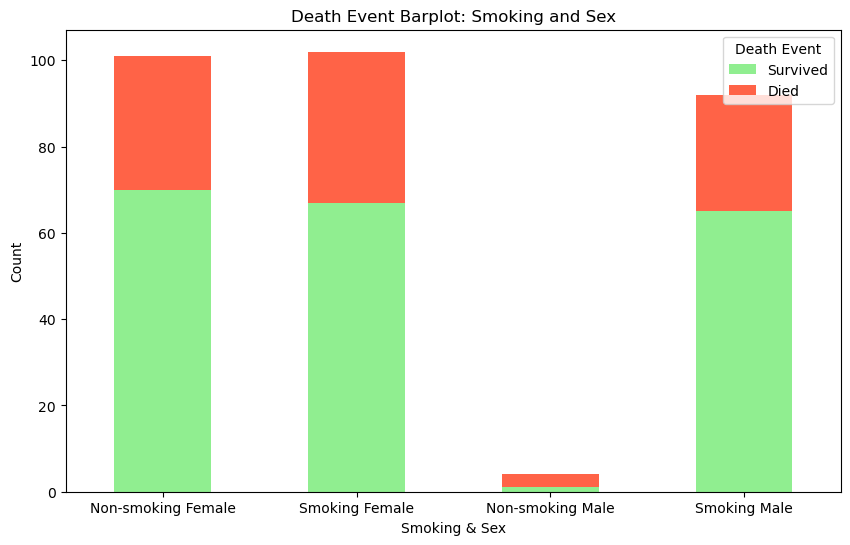

In [25]:
grouped_data = data.groupby(['smoking', 'sex'])['DEATH_EVENT'].value_counts().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, ax=ax, color=['lightgreen', 'tomato'])

plt.xlabel('Smoking & Sex')
plt.ylabel('Count')
plt.title('Death Event Barplot: Smoking and Sex')
plt.legend(title='Death Event', labels=['Survived', 'Died'])
plt.xticks(rotation=0)
x_labels = ['Non-smoking Female', 'Smoking Female', 'Non-smoking Male', 'Smoking Male']
plt.xticks(range(len(x_labels)), x_labels)
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
                     'serum_creatinine', 'serum_sodium', 'time']

numerical_data = data[numerical_columns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)
scaled_data_df = pd.DataFrame(scaled_data, columns=numerical_columns)
data[numerical_columns] = scaled_data_df

Logistic Regression:
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60



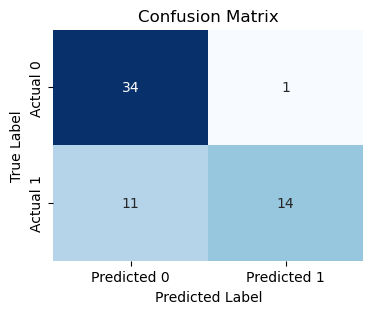


----------------------------

Random Forest:
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78        35
           1       0.73      0.44      0.55        25

    accuracy                           0.70        60
   macro avg       0.71      0.66      0.66        60
weighted avg       0.71      0.70      0.68        60



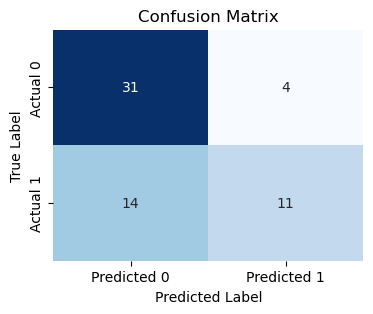


Logistic Regression cross validation scores: [0.65       0.78333333 0.88333333 0.85       0.6779661 ]

Random Forest cross validation scores): [0.48333333 0.8        0.81666667 0.7        0.6779661 ]


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

# Logistic Regression
logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

#random Forest
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# logistic Regression
print("Logistic Regression:")
evaluate_model(logistic_model, X_test, y_test)

print("\n----------------------------\n")

# Random Forest
print("Random Forest:")
evaluate_model(random_forest_model, X_test, y_test)

cv_scores_logistic = cross_val_score(logistic_model, X, y, cv=5)
cv_scores_rf = cross_val_score(random_forest_model, X, y, cv=5)

print("\nLogistic Regression cross validation scores:", cv_scores_logistic)
print("\nRandom Forest cross validation scores):", cv_scores_rf)
